In [1]:
install.packages("tidyverse")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”


Warning message:
“package ‘dplyr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [2]:
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
Divvy_Trips_2019_Q1 <- read.csv("../input/cyclistic-dataset/Divvy_Trips_2019_Q1.csv")
Divvy_Trips_2020_Q1 <- read.csv("../input/cyclistic-dataset/Divvy_Trips_2020_Q1.csv")


q1_2019 <- data.frame(Divvy_Trips_2019_Q1)
q1_2020 <- data.frame(Divvy_Trips_2020_Q1)

In [4]:
(q1_2019 <- rename(q1_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid
                   ,started_at = start_time
                   ,ended_at = end_time
                   ,start_station_name = from_station_name
                   ,start_station_id = from_station_id
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id
                   ,member_casual = usertype
))

#Checking data attributes-----

##str(q1_2019)
##str(q1_2020)

q1_2019 <- mutate(q1_2019, ride_id = as.character(ride_id)
                  ,rideable_type = as.character(rideable_type))

all_trips <- bind_rows(q1_2019, q1_2020)#, q3_2019)#, q4_2019, q1_2020)

all_trips <- all_trips %>%
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender, "tripduration"))

#Checking data attributes-----

##colnames(all_trips)
##nrow(all_trips)
##dim(all_trips)
##head(all_trips)
##str(all_trips)
##summary(all_trips)

all_trips <- all_trips %>%
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

table(all_trips$member_casual)
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) #shortest ride

#Checking table
##summary(all_trips_v2$ride_length)

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week,
          FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week,
FUN = mean)

all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week,
          FUN = mean)

all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>% #creates weekday field using wday()
group_by(member_casual, weekday) %>% #groups by usertype and weekday
  summarise(number_of_rides = n() #calculates the number of rides and average duration
            ,average_duration = mean(ride_length)) %>% # calculates the average duration
arrange(member_casual, weekday) # sorts

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,"1,783.00",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 0:16:06,2019-01-01 0:19:03,2708,177,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 0:18:41,2019-01-01 0:20:21,2796,100,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 0:18:43,2019-01-01 0:47:30,6205,"1,727.00",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995



casual member 
 71643 720313 

[1] FALSE

[1] TRUE

[1] 1189.459

[1] 539

[1] 10632022

[1] 1

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,5372.7839
member,795.2523


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1393
member,508


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,10632022
member,6096428


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,6090.7373
member,Friday,796.7338
casual,Monday,4752.0504
member,Monday,822.3112
casual,Saturday,4950.7708
member,Saturday,974.0730
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Thursday,8451.6669


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,6090.7373
member,Friday,796.7338
casual,Monday,4752.0504
member,Monday,822.3112
casual,Saturday,4950.7708
member,Saturday,974.0730
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Thursday,8451.6669


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Monday,4752.0504
member,Monday,822.3112
casual,Tuesday,4561.8039
member,Tuesday,769.4416
casual,Wednesday,4480.3724
member,Wednesday,711.9838
casual,Thursday,8451.6669


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,18652,5061.3044
casual,Mon,5591,4752.0504
casual,Tue,7311,4561.8039
casual,Wed,7690,4480.3724
casual,Thu,7147,8451.6669
casual,Fri,8013,6090.7373
casual,Sat,13473,4950.7708
member,Sun,60197,972.9383
member,Mon,110430,822.3112


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


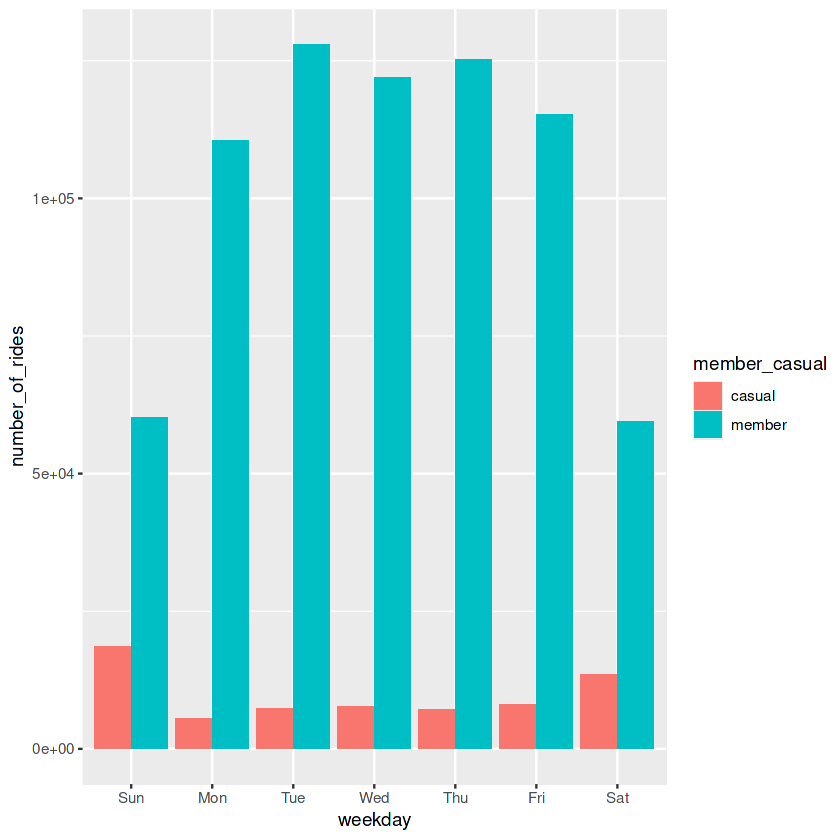

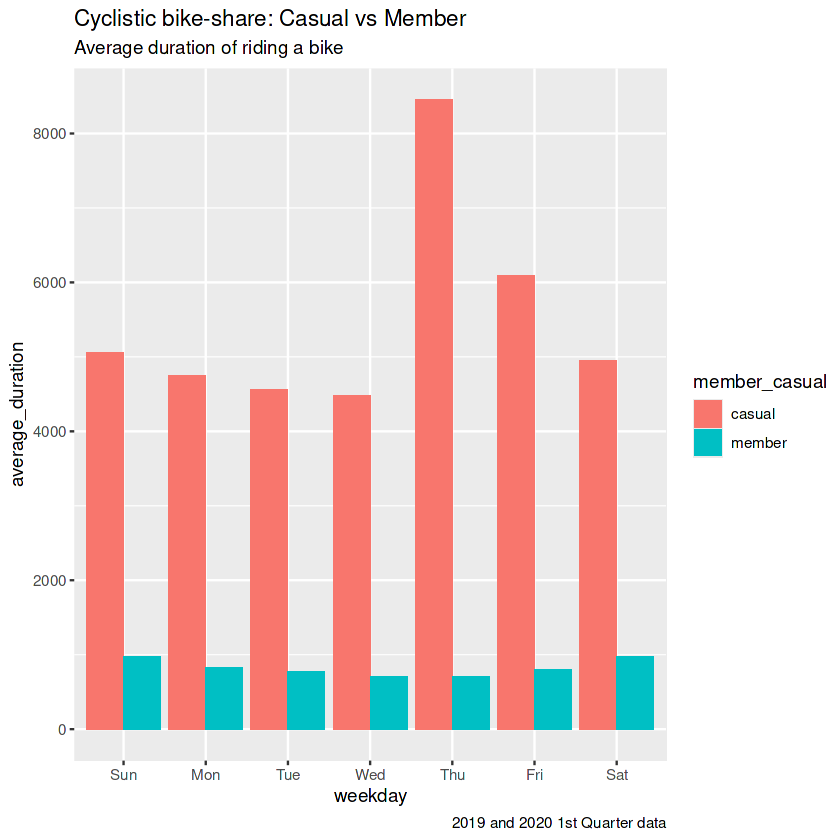

In [5]:
all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>%
  
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")


all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  ggtitle("Cyclistic bike-share: Casual vs Member") +
  labs(caption = ("2019 and 2020 1st Quarter data"), subtitle = ("Average duration of riding a bike"))